In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf
import librosa
import librosa.display
import IPython.display as ipd
import os
import time
from tqdm.notebook import tqdm

# Configuration de matplotlib
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 5)

print("Bibliothèques importées avec succès !")

Bibliothèques importées avec succès !


In [2]:
# Paramètres d'enregistrement
fs = 16000  # Fréquence d'échantillonnage en Hz
duration = 1  # Durée d'enregistrement en secondes (1 seconde suffit pour les mots courts)
channels = 1  # Mono

# Mots cibles à enregistrer
target_words = ["oui", "non", "un", "deux"]

# Nombre d'exemples par mot
examples_per_word = 10

# Chemin pour sauvegarder les fichiers audio
data_dir = "../data/recordings"

# Créer la structure des dossiers
for word in target_words:
    word_dir = os.path.join(data_dir, word)
    os.makedirs(word_dir, exist_ok=True)
    print(f"Dossier créé : {word_dir}")

print("\nConfiguration terminée !")

Dossier créé : ../data/recordings\oui
Dossier créé : ../data/recordings\non
Dossier créé : ../data/recordings\un
Dossier créé : ../data/recordings\deux

Configuration terminée !


In [3]:
def record_audio(duration=duration, fs=fs, channels=channels):
    """
    Enregistre l'audio avec le microphone et retourne le signal.
    """
    # Countdown
    for i in range(3, 0, -1):
        print(f"{i}...")
        time.sleep(0.5)
        
    print("Parlez maintenant !")
    
    # Enregistrement
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=channels, dtype='float32')
    sd.wait()  # Attendre la fin de l'enregistrement
    
    # Normalisation du volume (facultatif mais recommandé)
    if np.max(np.abs(audio)) > 0:
        audio = audio / np.max(np.abs(audio))
    
    # Conversion en mono si nécessaire
    if audio.ndim > 1:
        audio = audio.mean(axis=1)
        
    return audio

In [4]:
def visualize_audio(audio, fs=fs):
    """
    Affiche la forme d'onde et joue l'audio.
    """
    # Calcul de l'axe temporel
    time = np.arange(0, len(audio)) / fs
    
    # Affichage de la forme d'onde
    plt.figure(figsize=(14, 3))
    plt.plot(time, audio)
    plt.title('Forme d\'onde')
    plt.xlabel('Temps (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()
    
    # Lecture de l'audio
    return ipd.Audio(audio, rate=fs)

In [5]:
def save_audio(audio, word, example_index, fs=fs):
    """
    Sauvegarde l'audio dans le dossier approprié.
    """
    # Chemin du dossier pour ce mot
    word_dir = os.path.join(data_dir, word)
    
    # Nom du fichier
    filename = f"{word}_{example_index:02d}.wav"
    filepath = os.path.join(word_dir, filename)
    
    # Sauvegarde au format WAV
    sf.write(filepath, audio, fs)
    
    return filepath

In [6]:
def collect_examples_for_word(word, num_examples=examples_per_word):
    """
    Collecte plusieurs exemples audio pour un mot donné.
    """
    print(f"\n=== Collecte d'exemples pour le mot '{word}' ===\n")
    
    filepaths = []
    
    for i in range(1, num_examples + 1):
        print(f"\nExemple {i}/{num_examples} pour '{word}'")
        
        # Enregistrement
        audio = record_audio()
        
        # Visualisation et lecture
        audio_player = visualize_audio(audio)
        display(audio_player)
        
        # Demander à l'utilisateur si l'enregistrement est bon
        valid = input("Cet enregistrement est-il bon ? (o/n) : ").lower()
        
        if valid == 'o':
            # Sauvegarde
            filepath = save_audio(audio, word, i)
            filepaths.append(filepath)
            print(f"Sauvegardé : {filepath}")
        else:
            print("Enregistrement ignoré. Réessayons.")
            i -= 1  # Réessayer
    
    print(f"\nCollecte terminée pour le mot '{word}' ! {len(filepaths)} exemples sauvegardés.")
    return filepaths


=== Collecte d'exemples pour le mot 'oui' ===


Exemple 1/10 pour 'oui'
3...
2...
1...
Parlez maintenant !


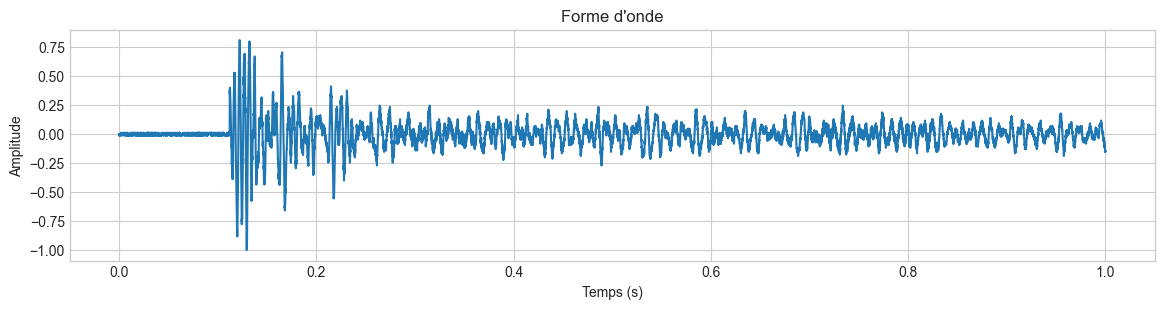

Cet enregistrement est-il bon ? (o/n) :  n


Enregistrement ignoré. Réessayons.

Exemple 2/10 pour 'oui'
3...
2...
1...
Parlez maintenant !


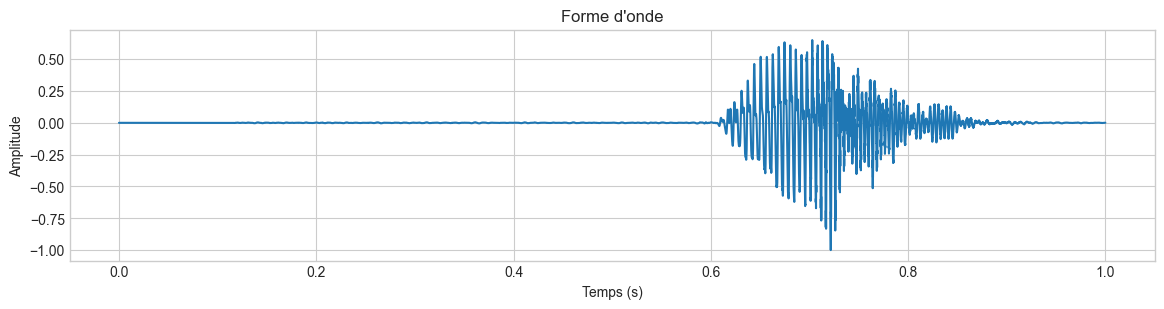

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\oui\oui_02.wav

Exemple 3/10 pour 'oui'
3...
2...
1...
Parlez maintenant !


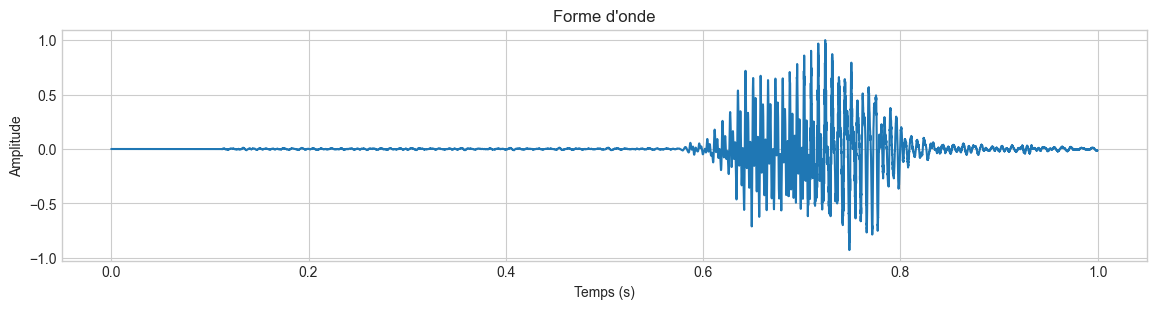

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\oui\oui_03.wav

Exemple 4/10 pour 'oui'
3...
2...
1...
Parlez maintenant !


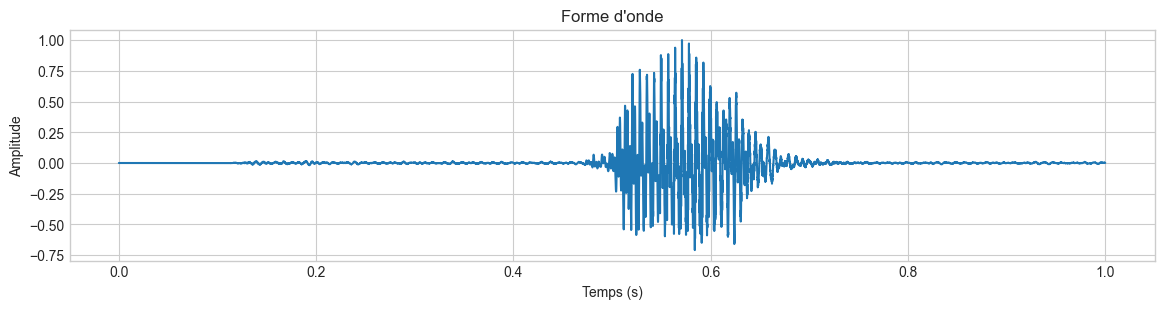

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\oui\oui_04.wav

Exemple 5/10 pour 'oui'
3...
2...
1...
Parlez maintenant !


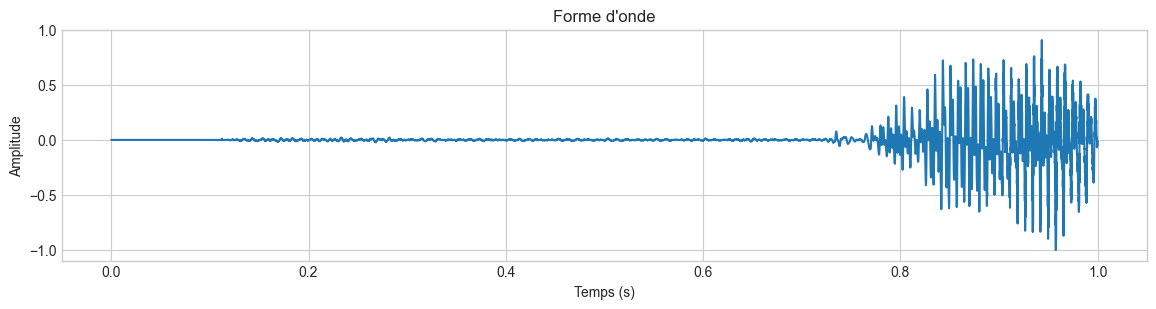

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\oui\oui_05.wav

Exemple 6/10 pour 'oui'
3...
2...
1...
Parlez maintenant !


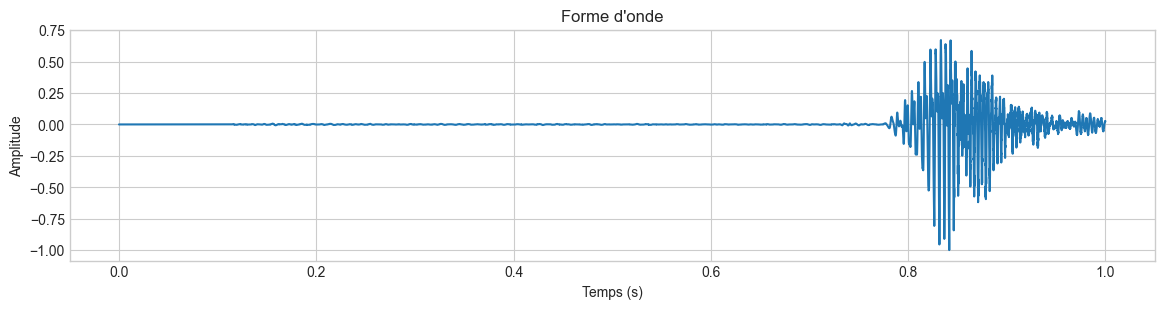

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\oui\oui_06.wav

Exemple 7/10 pour 'oui'
3...
2...
1...
Parlez maintenant !


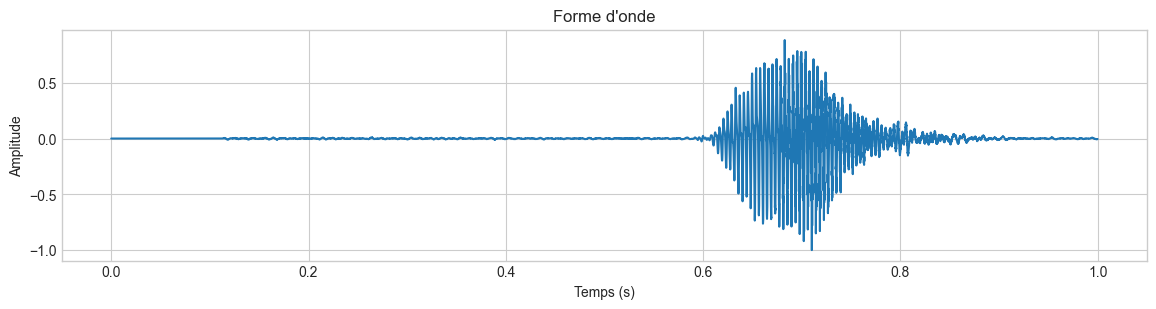

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\oui\oui_07.wav

Exemple 8/10 pour 'oui'
3...
2...
1...
Parlez maintenant !


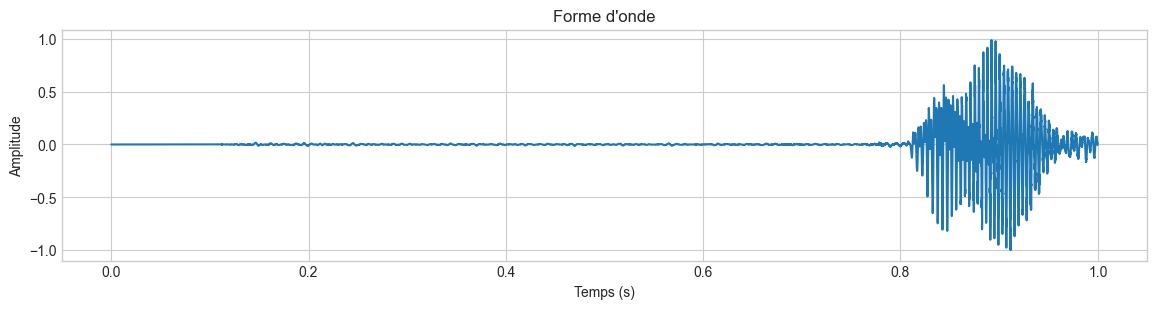

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\oui\oui_08.wav

Exemple 9/10 pour 'oui'
3...
2...
1...
Parlez maintenant !


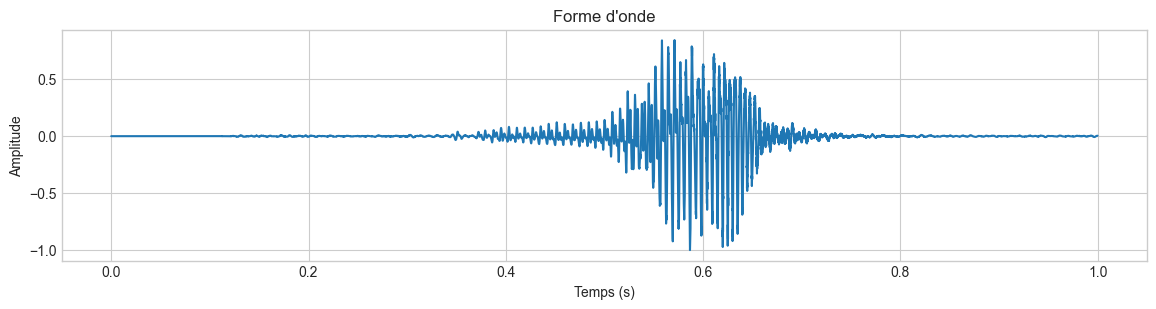

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\oui\oui_09.wav

Exemple 10/10 pour 'oui'
3...
2...
1...
Parlez maintenant !


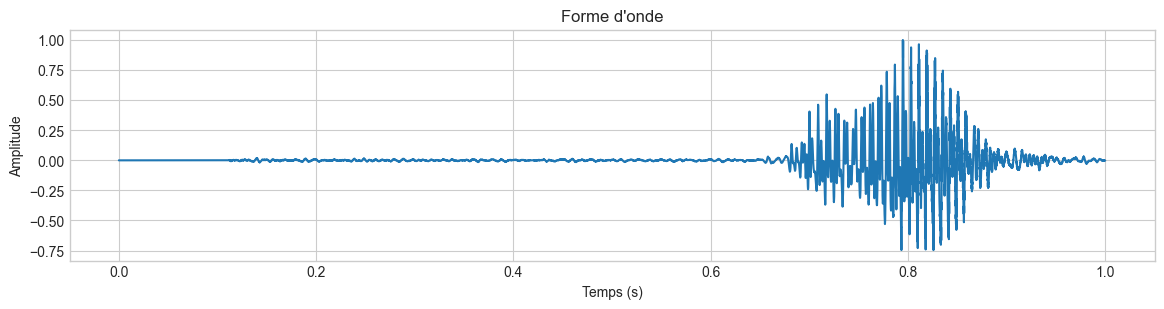

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\oui\oui_10.wav

Collecte terminée pour le mot 'oui' ! 9 exemples sauvegardés.

=== Collecte d'exemples pour le mot 'non' ===


Exemple 1/10 pour 'non'
3...
2...
1...
Parlez maintenant !


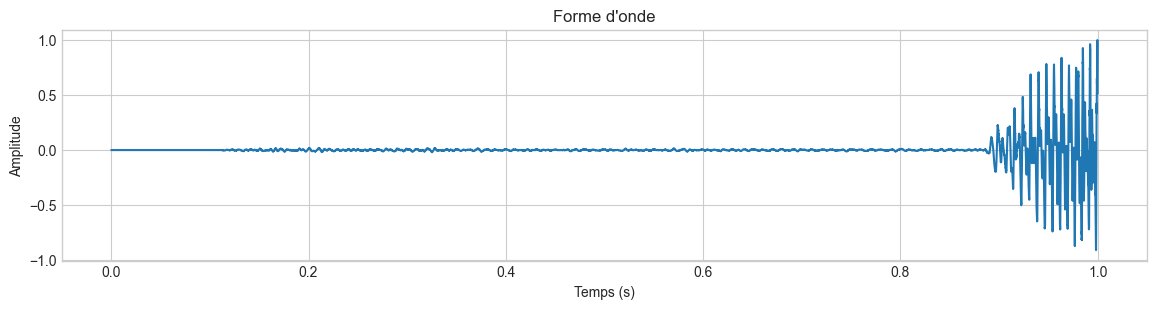

Cet enregistrement est-il bon ? (o/n) :  n


Enregistrement ignoré. Réessayons.

Exemple 2/10 pour 'non'
3...
2...
1...
Parlez maintenant !


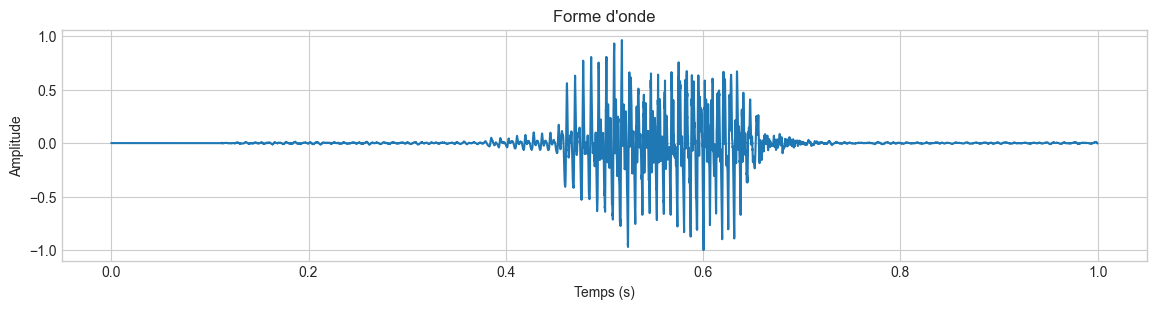

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\non\non_02.wav

Exemple 3/10 pour 'non'
3...
2...
1...
Parlez maintenant !


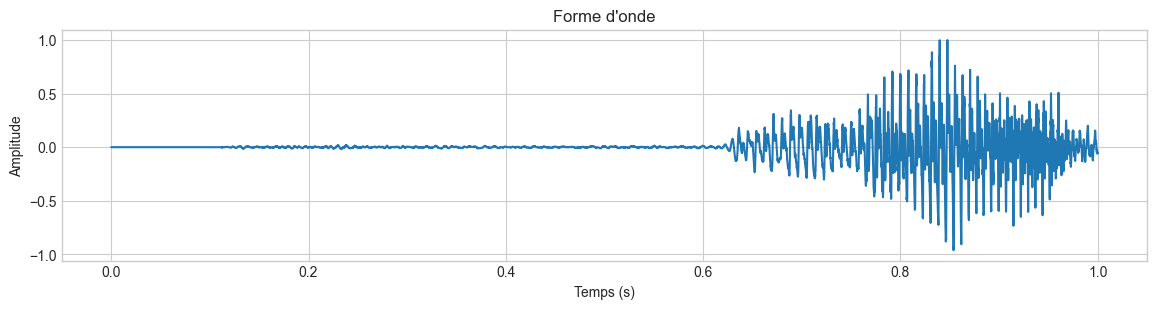

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\non\non_03.wav

Exemple 4/10 pour 'non'
3...
2...
1...
Parlez maintenant !


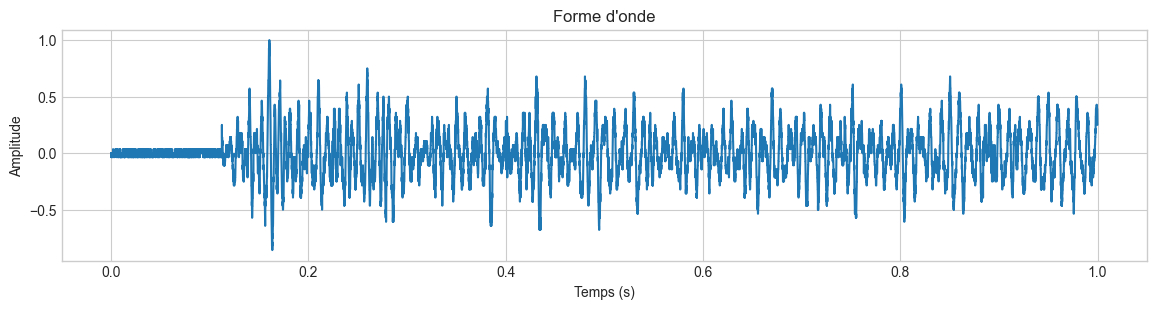

Cet enregistrement est-il bon ? (o/n) :  n


Enregistrement ignoré. Réessayons.

Exemple 5/10 pour 'non'
3...
2...
1...
Parlez maintenant !


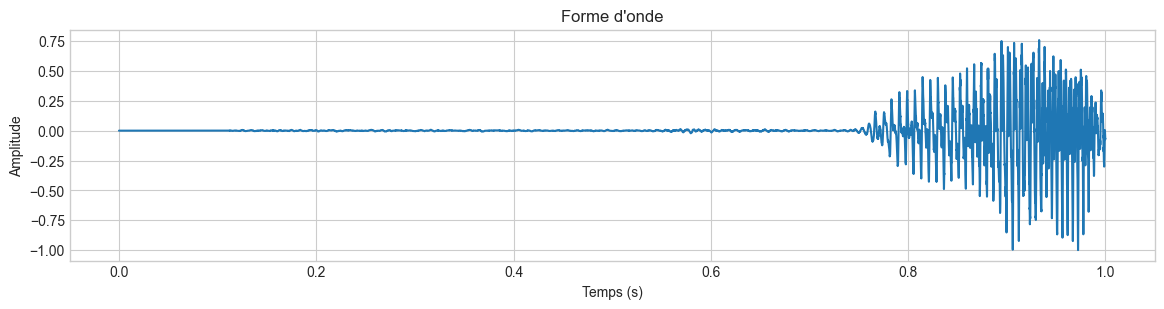

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\non\non_05.wav

Exemple 6/10 pour 'non'
3...
2...
1...
Parlez maintenant !


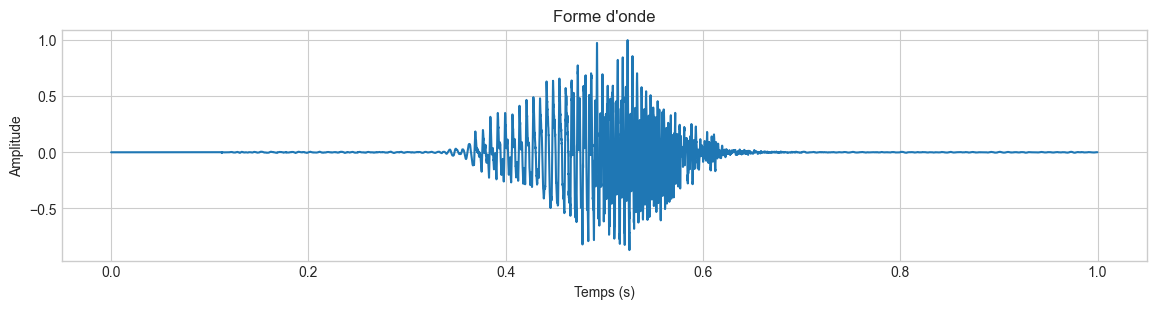

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\non\non_06.wav

Exemple 7/10 pour 'non'
3...
2...
1...
Parlez maintenant !


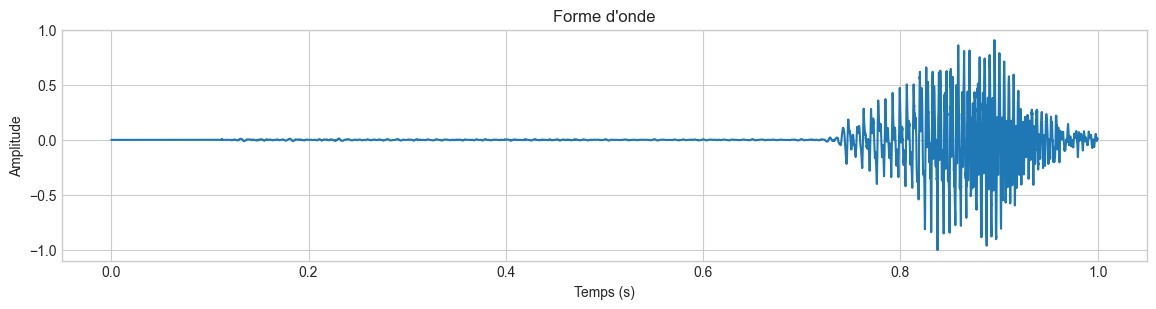

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\non\non_07.wav

Exemple 8/10 pour 'non'
3...
2...
1...
Parlez maintenant !


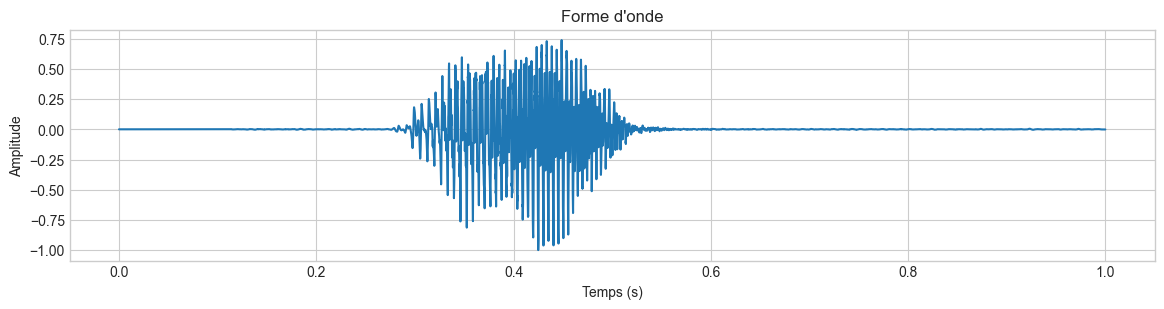

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\non\non_08.wav

Exemple 9/10 pour 'non'
3...
2...
1...
Parlez maintenant !


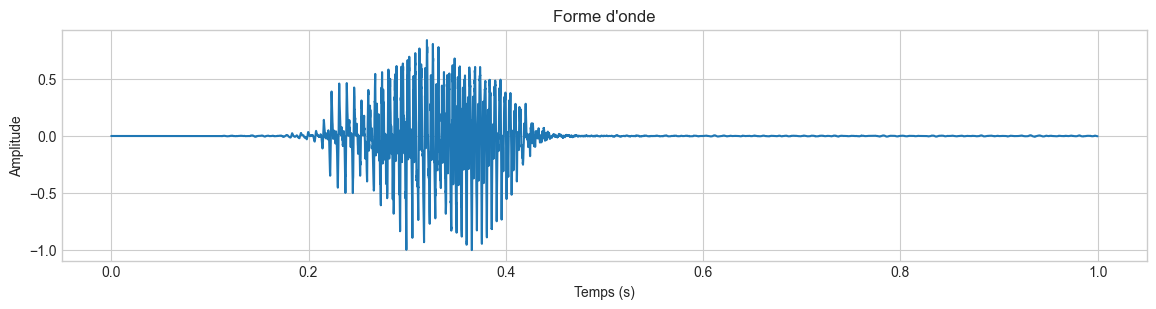

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\non\non_09.wav

Exemple 10/10 pour 'non'
3...
2...
1...
Parlez maintenant !


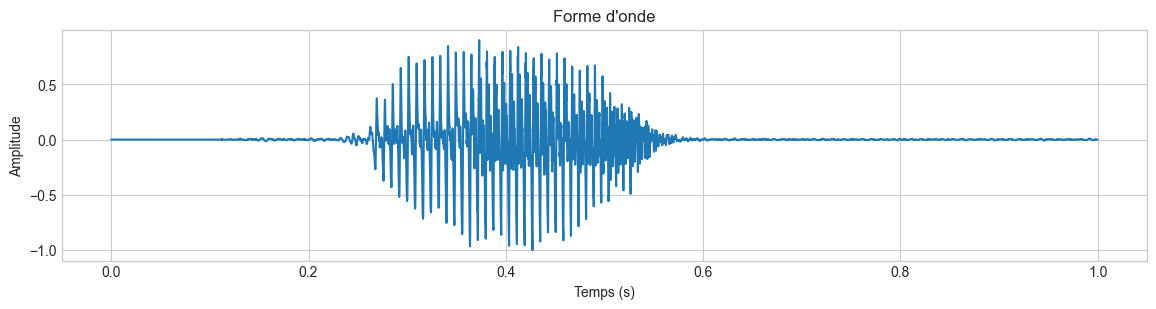

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\non\non_10.wav

Collecte terminée pour le mot 'non' ! 8 exemples sauvegardés.

=== Collecte d'exemples pour le mot 'un' ===


Exemple 1/10 pour 'un'
3...
2...
1...
Parlez maintenant !


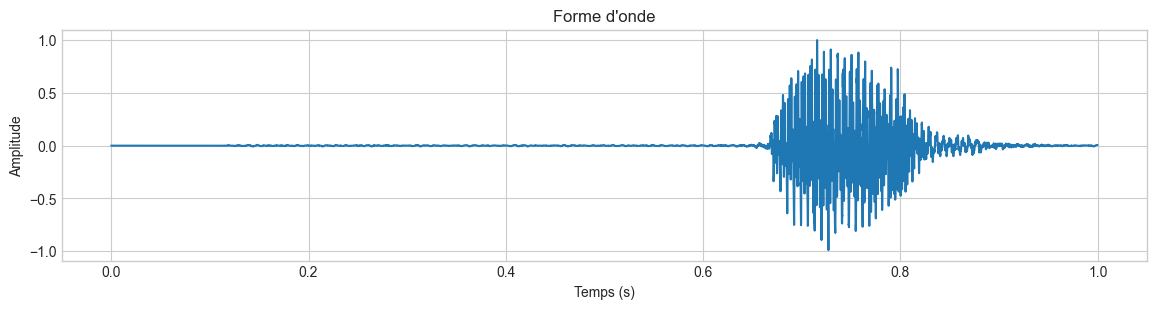

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\un\un_01.wav

Exemple 2/10 pour 'un'
3...
2...
1...
Parlez maintenant !


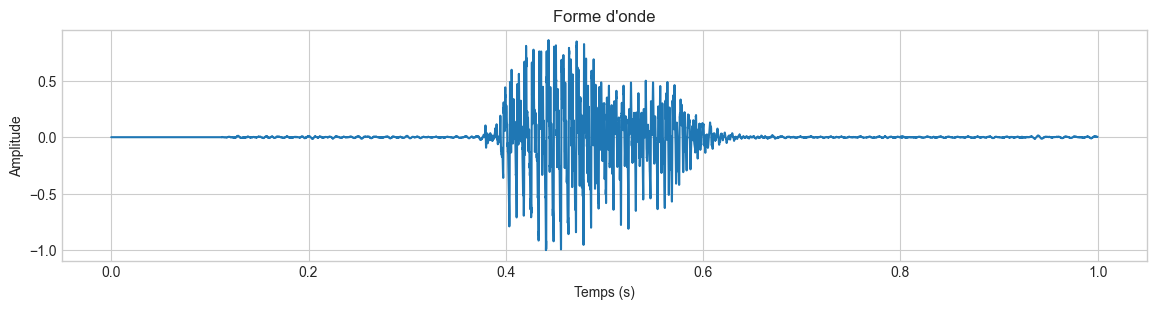

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\un\un_02.wav

Exemple 3/10 pour 'un'
3...
2...
1...
Parlez maintenant !


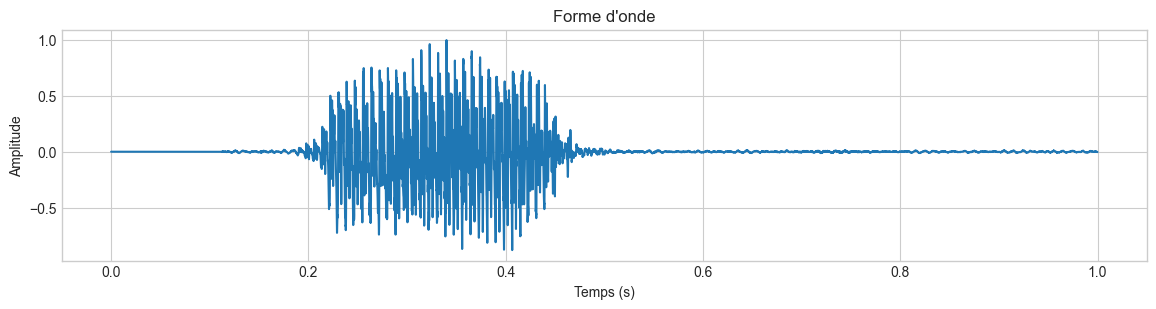

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\un\un_03.wav

Exemple 4/10 pour 'un'
3...
2...
1...
Parlez maintenant !


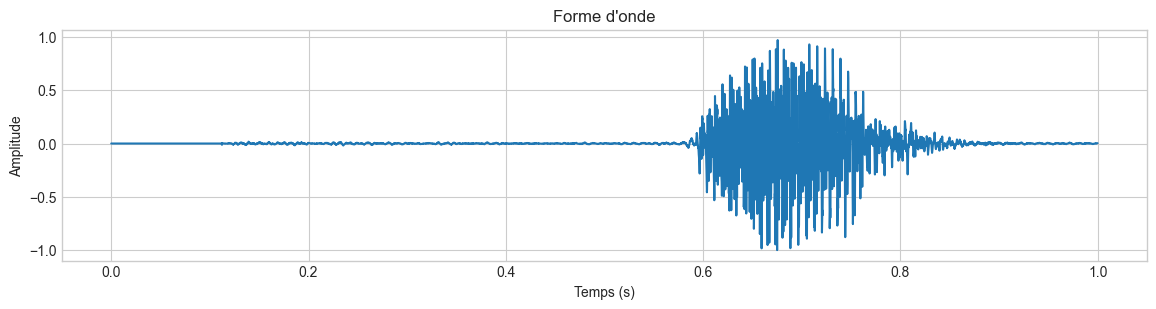

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\un\un_04.wav

Exemple 5/10 pour 'un'
3...
2...
1...
Parlez maintenant !


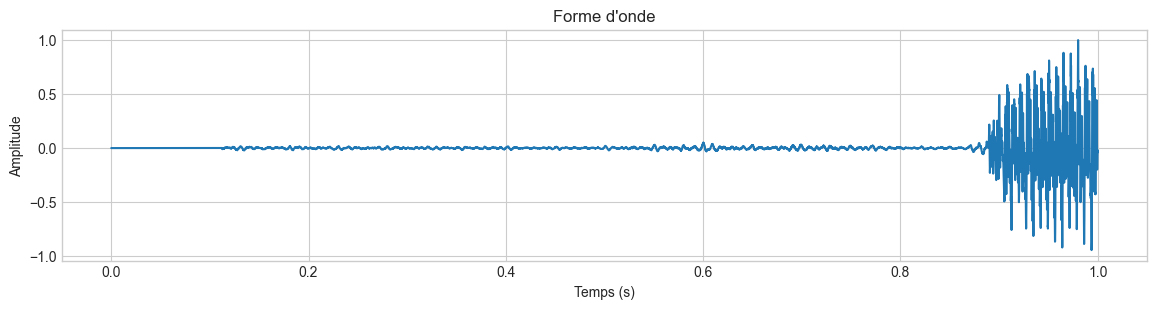

Cet enregistrement est-il bon ? (o/n) :  n


Enregistrement ignoré. Réessayons.

Exemple 6/10 pour 'un'
3...
2...
1...
Parlez maintenant !


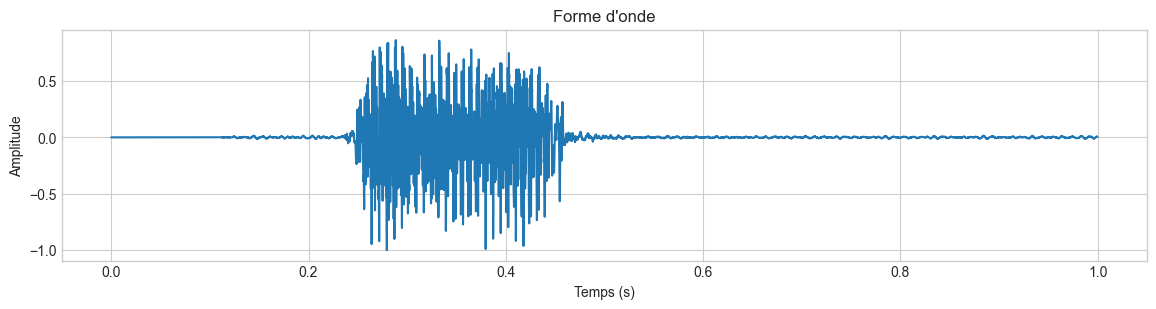

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\un\un_06.wav

Exemple 7/10 pour 'un'
3...
2...
1...
Parlez maintenant !


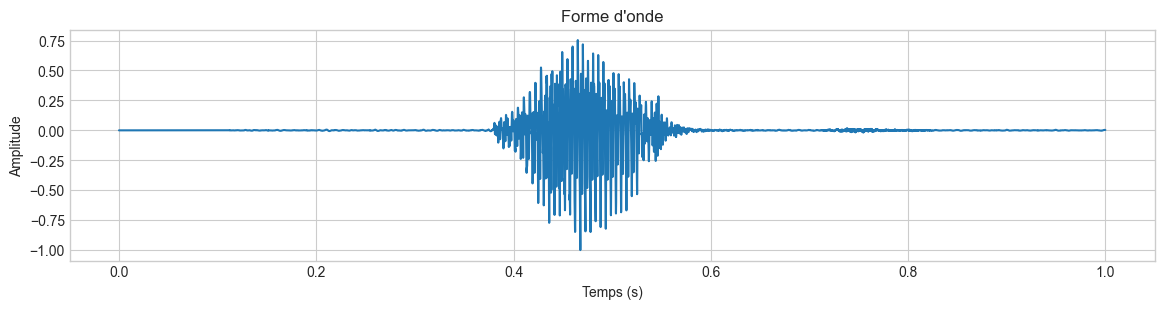

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\un\un_07.wav

Exemple 8/10 pour 'un'
3...
2...
1...
Parlez maintenant !


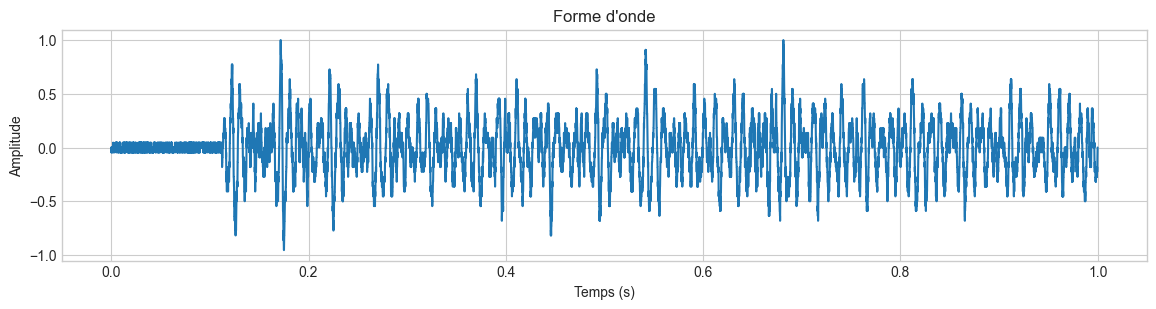

Cet enregistrement est-il bon ? (o/n) :  n


Enregistrement ignoré. Réessayons.

Exemple 9/10 pour 'un'
3...
2...
1...
Parlez maintenant !


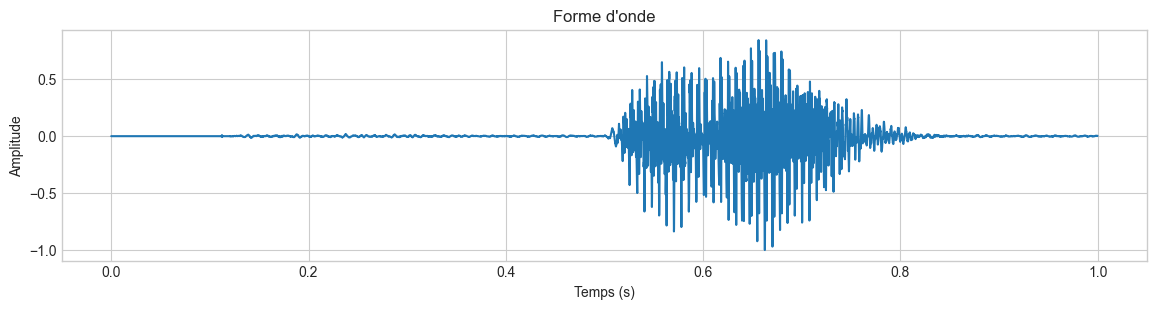

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\un\un_09.wav

Exemple 10/10 pour 'un'
3...
2...
1...
Parlez maintenant !


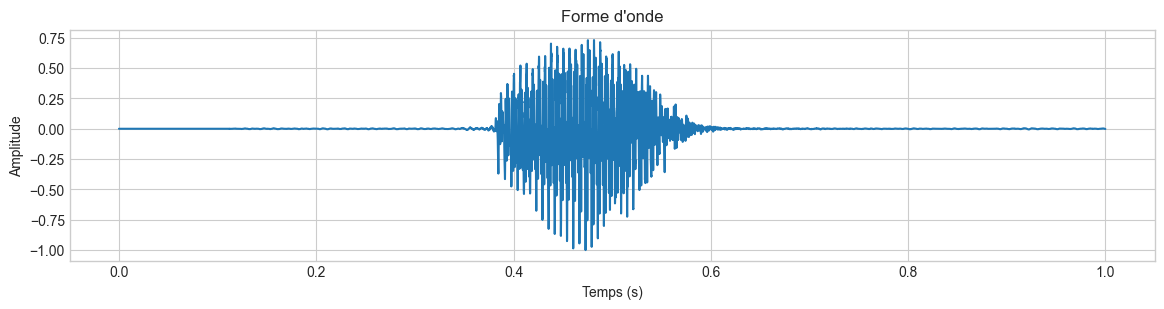

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\un\un_10.wav

Collecte terminée pour le mot 'un' ! 8 exemples sauvegardés.

=== Collecte d'exemples pour le mot 'deux' ===


Exemple 1/10 pour 'deux'
3...
2...
1...
Parlez maintenant !


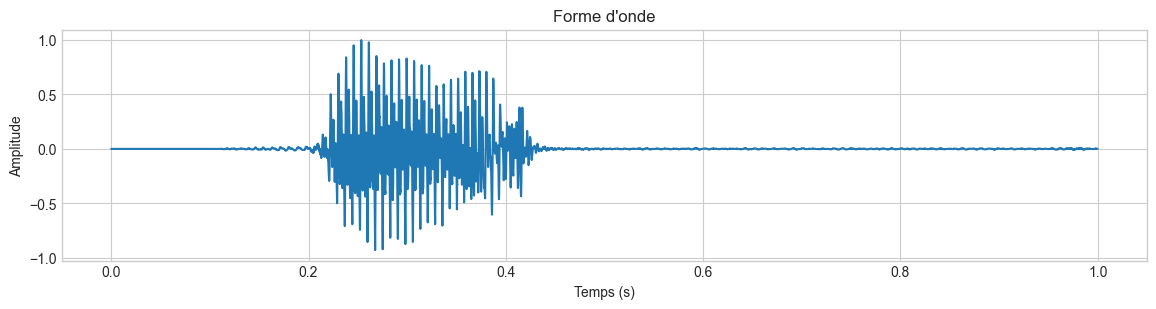

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\deux\deux_01.wav

Exemple 2/10 pour 'deux'
3...
2...
1...
Parlez maintenant !


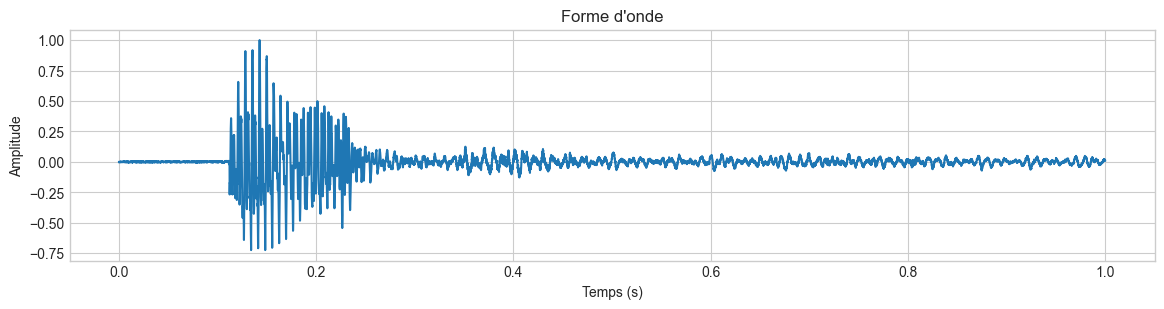

Cet enregistrement est-il bon ? (o/n) :  n


Enregistrement ignoré. Réessayons.

Exemple 3/10 pour 'deux'
3...
2...
1...
Parlez maintenant !


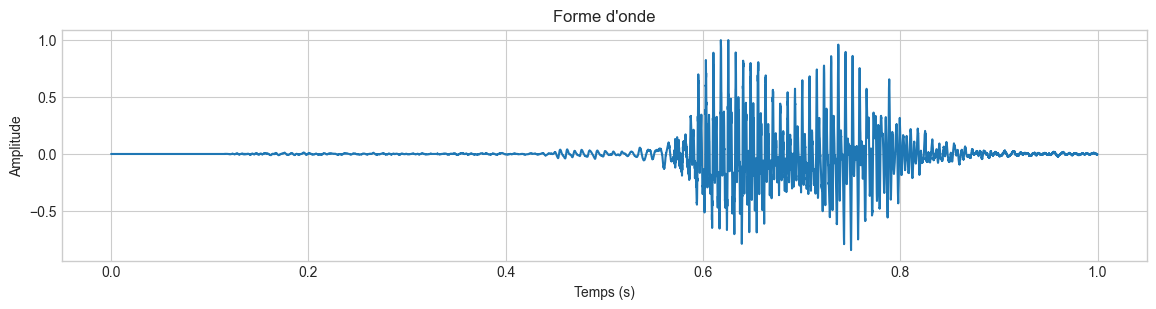

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\deux\deux_03.wav

Exemple 4/10 pour 'deux'
3...
2...
1...
Parlez maintenant !


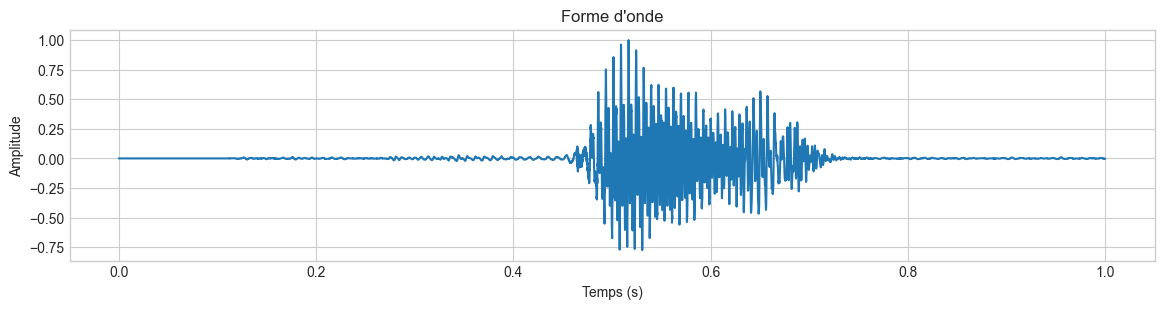

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\deux\deux_04.wav

Exemple 5/10 pour 'deux'
3...
2...
1...
Parlez maintenant !


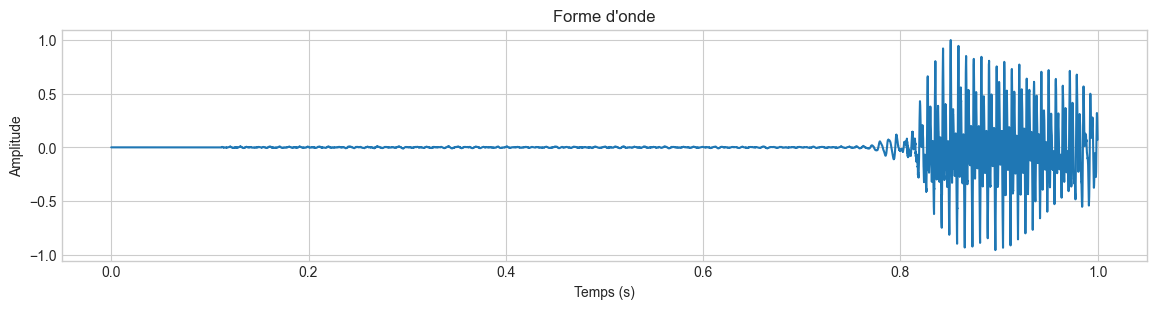

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\deux\deux_05.wav

Exemple 6/10 pour 'deux'
3...
2...
1...
Parlez maintenant !


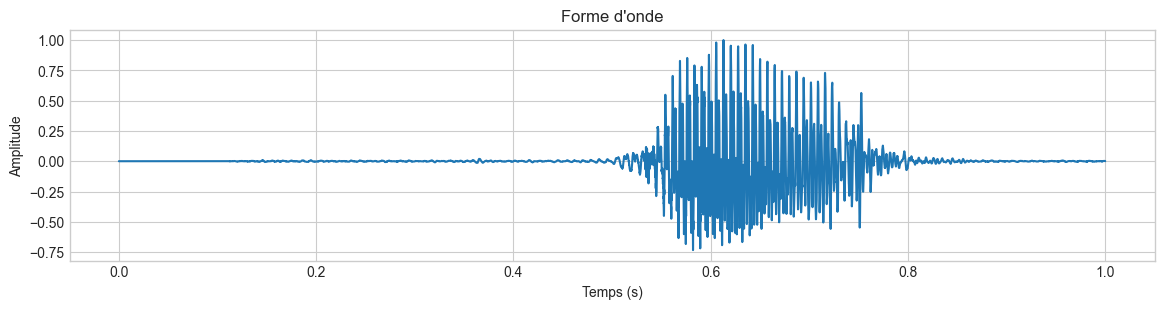

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\deux\deux_06.wav

Exemple 7/10 pour 'deux'
3...
2...
1...
Parlez maintenant !


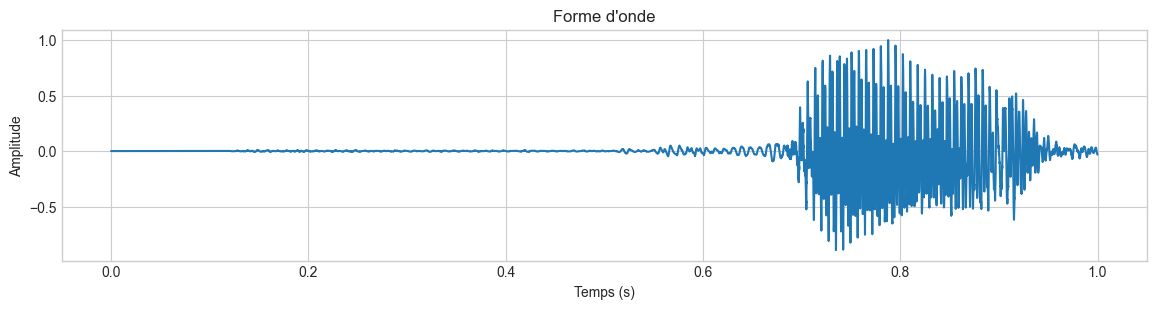

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\deux\deux_07.wav

Exemple 8/10 pour 'deux'
3...
2...
1...
Parlez maintenant !


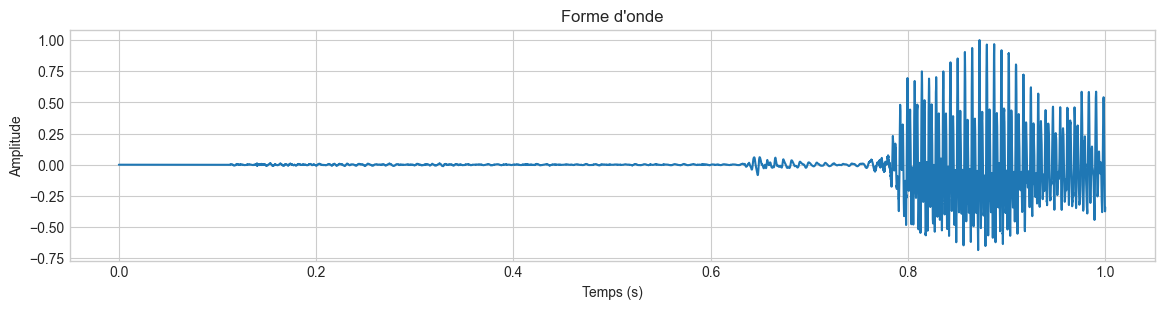

Cet enregistrement est-il bon ? (o/n) :  n


Enregistrement ignoré. Réessayons.

Exemple 9/10 pour 'deux'
3...
2...
1...
Parlez maintenant !


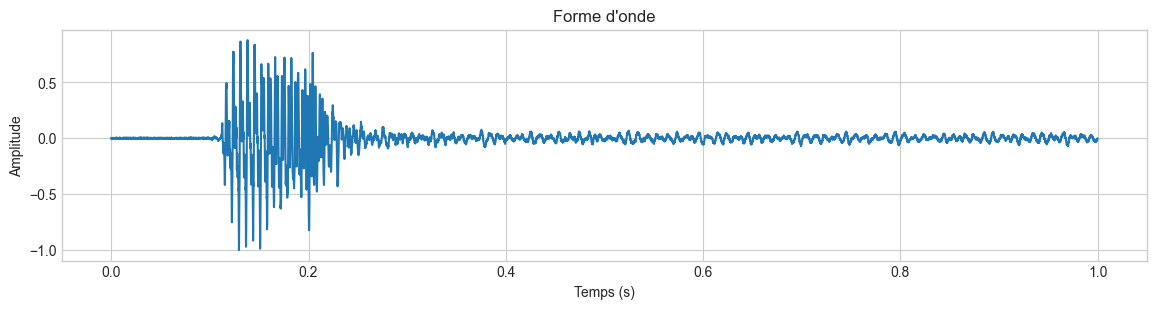

Cet enregistrement est-il bon ? (o/n) :  n


Enregistrement ignoré. Réessayons.

Exemple 10/10 pour 'deux'
3...
2...
1...
Parlez maintenant !


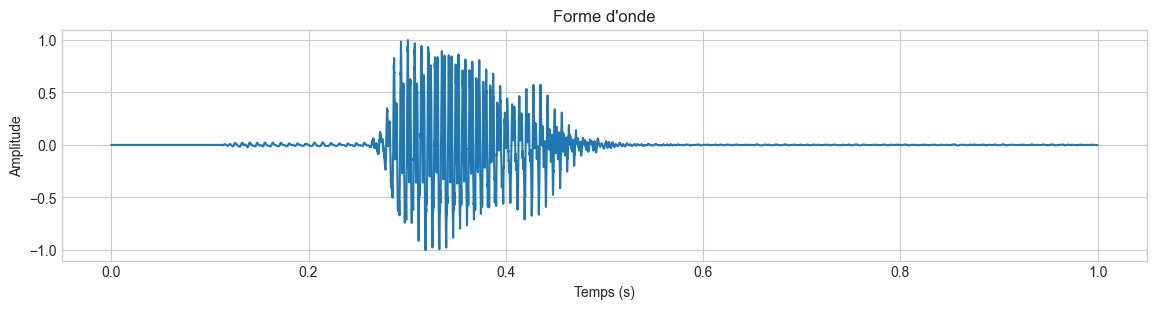

Cet enregistrement est-il bon ? (o/n) :  o


Sauvegardé : ../data/recordings\deux\deux_10.wav

Collecte terminée pour le mot 'deux' ! 7 exemples sauvegardés.

Collecte terminée pour tous les mots !


In [7]:
# Pour collecter des exemples pour tous les mots
all_filepaths = {}

for word in target_words:
    filepaths = collect_examples_for_word(word)
    all_filepaths[word] = filepaths
    
print("\nCollecte terminée pour tous les mots !")

In [8]:
def check_data_collection():
    """
    Vérifie les données collectées et affiche un résumé.
    """
    print("=== Résumé des données collectées ===\n")
    
    total_examples = 0
    
    for word in target_words:
        word_dir = os.path.join(data_dir, word)
        files = [f for f in os.listdir(word_dir) if f.endswith('.wav')]
        
        print(f"Mot '{word}' : {len(files)} exemples")
        total_examples += len(files)
        
        # Afficher quelques statistiques si des exemples existent
        if len(files) > 0:
            durations = []
            for file in files[:5]:  # Limite à 5 fichiers pour économiser du temps
                filepath = os.path.join(word_dir, file)
                audio, sr = librosa.load(filepath, sr=None)
                durations.append(len(audio) / sr)
            
            if durations:
                print(f"  Durée moyenne : {np.mean(durations):.2f} secondes")
                print(f"  Durée min/max : {np.min(durations):.2f}/{np.max(durations):.2f} secondes")
    
    print(f"\nTotal : {total_examples} exemples")
    
# Exécuter cette fonction pour vérifier les données
check_data_collection()

=== Résumé des données collectées ===

Mot 'oui' : 9 exemples
  Durée moyenne : 1.00 secondes
  Durée min/max : 1.00/1.00 secondes
Mot 'non' : 8 exemples
  Durée moyenne : 1.00 secondes
  Durée min/max : 1.00/1.00 secondes
Mot 'un' : 8 exemples
  Durée moyenne : 1.00 secondes
  Durée min/max : 1.00/1.00 secondes
Mot 'deux' : 7 exemples
  Durée moyenne : 1.00 secondes
  Durée min/max : 1.00/1.00 secondes

Total : 32 exemples
